#### Importing Python libraries

In [1]:
!pip install -q --upgrade pandas

In [1]:
# Basic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from scipy import stats as st
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from imblearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error

# Visualization
import seaborn as sns

# Machine Learning For Business Project
### Project Description:

OilyGiant is a mining company. Our task is to find the best place for a new well.

We have data on oil samples from three regions. Parameters of each oil well in the region are already known. 
We are asked to build a model that will help to pick the region with the highest profit margin and risk of losses lower than 2.5%


The information given is as follows:

Features:

- id — unique oil well identifier
- f0, f1, f2 — three features of points (their specific meaning is unimportant,but the features themselves are significant)

Target:

- product — volume of reserves in the oil well (thousand barrels).

<a id="contents"></a>
# Table of contents

- [Step 1](#step1) Data loading and preprocessing
- [Step 2](#step2) Train and test the model for each region
- [Step 3](#step3) Prepare for profit calculation:
- [Step 4](#step4) Write a function to calculate profit from a set of selected oil wells and model predictions
- [Step 5](#step5) Calculate risks and profit for each region

<a id="step1"></a>
## Step 1. Data loading and preprocessing

[back to table of contents](#contents)

### Download and study the data

In [2]:
# Downloading the file and saving the data as a datafarme
try:
    geo_data_0     = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1     = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2     = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_data_0     = pd.read_csv('geo_data_0.csv' , encoding = "ISO-8859-1")
    geo_data_1     = pd.read_csv('geo_data_1.csv' , encoding = "ISO-8859-1")
    geo_data_2     = pd.read_csv('geo_data_2.csv' , encoding = "ISO-8859-1")

In [5]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [12]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [13]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


#### Checking for null values

In [14]:
geo_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [15]:
geo_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [16]:
geo_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

#### Checking for duplications

In [17]:
geo_data_0['id'].duplicated().sum()

10

In [18]:
duplicate_ids= geo_data_0['id'][geo_data_0['id'].duplicated() == True].reset_index()

In [19]:
geo_data_0.query('id in @duplicate_ids.id').sort_values(by = 'id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


In [20]:
duplicate_ids_1= geo_data_1['id'][geo_data_1['id'].duplicated() == True].reset_index()
geo_data_1.query('id in @duplicate_ids_1.id').sort_values(by = 'id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [21]:
duplicate_ids_2= geo_data_2['id'][geo_data_2['id'].duplicated() == True].reset_index()
geo_data_2.query('id in @duplicate_ids_2.id').sort_values(by = 'id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


- As we can see, some of the inspections have non-unique id. (10, 4 and 4 in regions 0, 1 and 2 respectively). What should I do with this inspections? 
 - Since it is not a full duplication, but only the id's are duplicate, I assume they are a different inspections and not real duplications. probably due to typing error.
 - It means that every inspection is independant and is valuable for our predictions as part of the training set (the id itself is not part of the features).
 - On the other side, the number is so small (0.02%), that dropping this inspections will have no influence.
- I will leave these inspections, while removing the 'id' column

#### Looking for the correlations between features/target

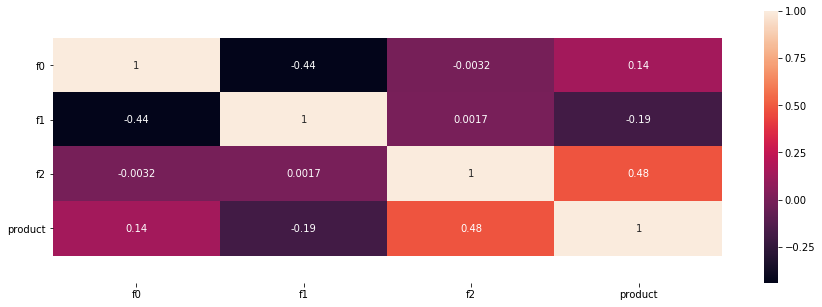

In [28]:
# Correlations in region 0
plt.figure(figsize=(15,5))
ax = sns.heatmap(geo_data_0.corr(), annot=True, cmap='rocket')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.yticks(rotation=0);

- f0 has very low correlation to the target (0.14)
 - It is negatively meduim correlataed to the f1 (-0.44)
- f1 has very low correlation to the target (-0.19)
- f2 is positively meduim correlated to the target (0.48)

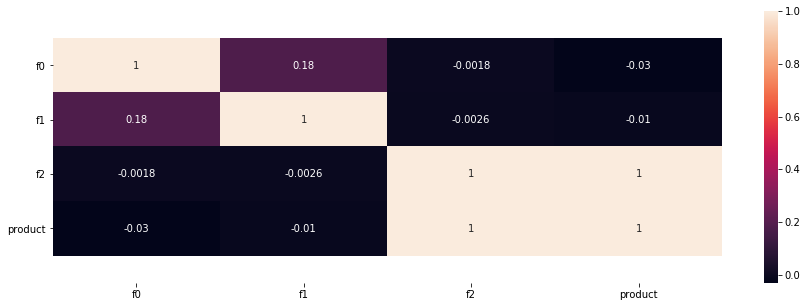

In [29]:
# Correlations in region 1
plt.figure(figsize=(15,5))
ax = sns.heatmap(geo_data_1.corr(), annot=True, cmap='rocket')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.yticks(rotation=0);

- f0 has very low correlation with all other parameters
- f1 also has very low correlation with all other parameters
- f2 has positive 100% correlation with the target!

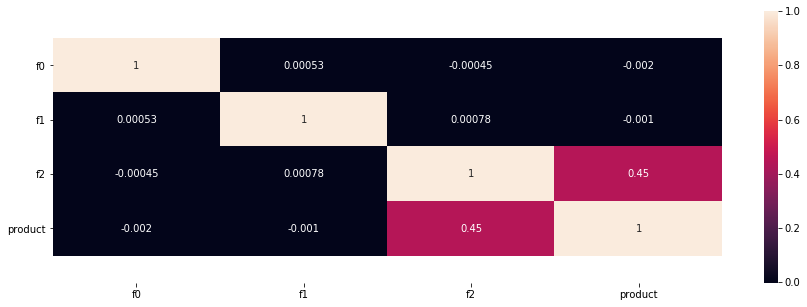

In [30]:
# Correlations in region 2
plt.figure(figsize=(15,5))
ax = sns.heatmap(geo_data_2.corr(), annot=True, cmap='rocket')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.yticks(rotation=0);

- f0 f0 has very low correlation with all other parameters
- f1 also has very low correlation with all other parameters
- f2 is positively meduim correlated to the target (0.45)

### Data preprocessing

#### Removing unnecessary columns:

In [3]:
# The id column is not necessary for the prediction, so I will drop it

geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

### Explain the procedure

- We have 100,000 inspections in each data set
- There are no null values in any of the data sets
- Data types are correct: all the features and the target are numeric
- Duplicate id's: there are some inspecctions with id's that are not unique. I believe that the data itself is real, and since the id column does not take part in the analysis, I will remove it anyway.
- The correlations between the features and the target and between themselves changes from region to region. but in general, f2 has the highest correlation with the target in all regions
- We removed the 'id' column

<a id="step2"></a>
## Step 2. Train and test the model for each region

[back to table of contents](#contents)

### Split the data into a training set and validation set at a ratio of 7525.

In [4]:
# Defining splitting function which receives a data set, target label and test ratio and returns splitted sets

def train_test_split_func(data, target_name, test_ratio):
    target = data[target_name]
    features = data.drop([target_name], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=test_ratio, random_state=12345
    )
    return features_train, features_valid, target_train, target_valid

In [5]:
# Calling the function for region=0, test_ratio=0.25
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split_func(
    geo_data_0, 'product', 0.25
)

In [6]:
print(features_train_0.shape)
print(features_valid_0.shape)
print(target_train_0.shape)
print(target_valid_0.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [7]:
# Calling the function for region=1, test_ratio=0.25
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split_func(
    geo_data_1, 'product', 0.25
)

In [8]:
# Calling the function for region=2, test_ratio=0.25
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split_func(
    geo_data_2, 'product', 0.25
)

### Standardize the numerical features

In [9]:
# Defining scaling function which receives features and valid train sets and numerical features list and returns standardized sets
# We will use Standard scaler: (Old value - Mean value) / Standard deviation

def scaler_func(features_train, features_valid, numeric_features):
    scaler = StandardScaler()
    
    # We fit the scaler on TRAINING dataset in order to prevent data leakage
    scaler.fit(features_train[numeric_features])
    
    # We apply fitted scaler to both train and valid datasets
    features_train[numeric_features] = scaler.transform(features_train[numeric_features])
    features_valid[numeric_features] = scaler.transform(features_valid[numeric_features])
    
    return features_train, features_valid

In [10]:
# we'll use Scaling for numeric columns
numeric = ['f0', 'f1', 'f2']

# Calling the scaling function for region=0
features_train_0, features_valid_0 = scaler_func(
    features_train_0, features_valid_0, numeric
)

# Calling the scaling function for region=1
features_train_1, features_valid_1 = scaler_func(
    features_train_1, features_valid_1, numeric
)

# Calling the scaling function for region=2
features_train_2, features_valid_2 = scaler_func(
    features_train_2, features_valid_2, numeric
)

In [11]:
print(features_train_0.shape)
print(features_valid_0.shape)

(75000, 3)
(25000, 3)


In [12]:
features_train_0.head(3)

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865


### Train the model and make predictions for the validation set.

### Save the predictions and correct answers for the validation set.

### Print the average volume of predicted reserves and model RMSE.

In [13]:
# Defining model training and prediction function

def train_predict_LinearRegression(features_train, target_train, features_valid, target_valid):
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    predicted_valid_idx = pd.Series(predicted_valid, index=target_valid.index)
    
    predicted_avg = predicted_valid.mean()
    mse = mean_squared_error(target_valid, predicted_valid)

    print('Average predicted reserves =', predicted_avg)
    print('RMSE =', mse ** 0.5)
    
    constant_predictions = pd.Series(target_train.mean(), index = target_valid.index)
    mse = mean_squared_error(target_valid, constant_predictions)

    print(' ')
    print('Constant model:')
    #print('MSE =', mse)
    print('RMSE =', mse ** 0.5)
    print(' ')
    
    return predicted_valid, predicted_valid_idx

In [14]:
# Calling the model train_predict function and print the metrics
print('Linear Regression Results')
print('-------------------------')

# Calling the train_predict function for region=0
print('region 0:')
print('---------')
predicted_valid_0, predicted_valid_idx_0 = train_predict_LinearRegression(
    features_train_0, target_train_0, features_valid_0, target_valid_0
)

# Calling the train_predict function for region=1
print('region 1:')
print('---------')
predicted_valid_1, predicted_valid_idx_1 = train_predict_LinearRegression(
    features_train_1, target_train_1, features_valid_1, target_valid_1
)

# Calling the train_predict function for region=2
print('region 2:')
print('---------')
predicted_valid_2, predicted_valid_idx_2 = train_predict_LinearRegression(
    features_train_2, target_train_2, features_valid_2, target_valid_2
)

Linear Regression Results
-------------------------
region 0:
---------
Average predicted reserves = 92.59256778438038
RMSE = 37.5794217150813
 
Constant model:
RMSE = 44.289591053907365
 
region 1:
---------
Average predicted reserves = 68.728546895446
RMSE = 0.8930992867756158
 
Constant model:
RMSE = 46.02144533725462
 
region 2:
---------
Average predicted reserves = 94.96504596800489
RMSE = 40.02970873393434
 
Constant model:
RMSE = 44.90234968510566
 


### Analyze the results.

- The linear regression model is generaly predicting better then a constant model (that always predict the mean).
 - region 0: RMSE is 37 comparing to 44 with the constant model
 - region 1: RMSE is 0.89!!!! comparing to 46
 - region 2: RMSE is 40 comparing to 45
    
- Region 2 has the highest av. predicted reserve for one well (95), region 0 is not far, with 92.6, and region 1 is the lowest, with 69 avg. reserve units   

<a id="step3"></a>
## Step 3. Prepare for profit calculation:

[back to table of contents](#contents)

### Store all key values for calculations in separate variables

In [15]:
# The revenue from one unit of product is 4,500 dollars
one_unit_revenue = 4500

# The budget for development of 200 oil wells is 100 USD million
dev_budget = 100000000

# Picking the best 200 points for the profit calculation
no_of_wells = 200

# Risk of loss 
max_loss_risk = 2.5

### Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [16]:
# The formula for calculating the volume of reserves sufficient for profit and loss balance (break-even point):
# dev_budget = one_unit_revenue * balance_reserves * no_of_wells 

balance_reserves = dev_budget/ (one_unit_revenue * no_of_wells)
print('Balance reserves = ', balance_reserves)

Balance reserves =  111.11111111111111


In [17]:
# Defining a function that gets data set, caculates the target average and compares it with a the break-even point
# Average volume of reserves in each region:

def balance_compare(data, balance_reserves):
        
    mean_reserves = data['product'].mean()
    print('Average volume of reserves =', mean_reserves)
    if mean_reserves > balance_reserves:
        print('Region average reserves is higher then sufficient for balance')
    if mean_reserves == balance_reserves:    
        print('Region average reserves equal the sufficient for balance')
    else:
        print('Region average reserves is less then sufficient for balance')

    print(' ')

In [18]:
# Calling balance_compare function and print the results

# Calling the balance_compare function for region=0
print('region 0:')
print('---------')
balance_compare(geo_data_0, balance_reserves)

# Calling the balance_compare function for region=1
print('region 1:')
print('---------')
balance_compare(geo_data_1, balance_reserves)

# Calling the balance_compare function for region=2
print('region 2:')
print('---------')
balance_compare(geo_data_2, balance_reserves)

region 0:
---------
Average volume of reserves = 92.50000000000001
Region average reserves is less then sufficient for balance
 
region 1:
---------
Average volume of reserves = 68.82500000000002
Region average reserves is less then sufficient for balance
 
region 2:
---------
Average volume of reserves = 95.00000000000004
Region average reserves is less then sufficient for balance
 


### Provide the findings about the preparation for profit calculation step.

- I have calculated the average volume of reserves required for balance between the investments and the revenues like this:
    - The budget for developing 200 wells is 100 Million USD. 
    - revenues for one unit is 4,500 USD 
    - the volume of one well reserves, duplicated by 4,500 (revenues for one unit) duplicated by 200, is the total revenue.
    - the missing variable is the volume of one well reserves, and we get it by dividing 100 million by (4500 * 200)
    
- I found that non of the regions' average product volume is sufficient for balancing the development costs.
- That is why we should pick in each region the highest reserves volume wells

<a id="step4"></a>
## Step 4. Write a function to calculate profit from a set of selected oil wells and model predictions:

[back to table of contents](#contents)

### Pick the wells with the highest values of predictions.

### Summarize the target volume of reserves in accordance with these predictions

In [19]:
# Defining profit function, which gets target and predictions sets, and the number of final inspections and returns the profit
def profit(target, predictions, count):
    
    investment = 100000000
    k_units_revenue = 4500
    
    preds = pd.Series(predictions) # convert an array to a series
    preds_sorted = preds.sort_values(ascending=False)
    preds_sorted_indexes = pd.Series(preds_sorted.index)[:count]

    selected = target.iloc[preds_sorted_indexes]

    well_avg = selected.mean()
    revenues =  k_units_revenue * selected.sum()
    print('Average well reserve =      ', well_avg)
    print('Total volume for region = ', selected.sum())
    print('Total revenue =       ', revenues)
    print('Profit =               ', revenues - investment)
    print(' ')
    
    return revenues - investment

In [40]:
# Run the picking highest value's wells + profit calculation function

print('Region 0: ')
print('----------')
profit(target_valid_0, predicted_valid_0, 200)

print('Region 1: ')
print('----------')
profit(target_valid_1, predicted_valid_1, 200)

print('Region 2: ')
print('----------')
profit(target_valid_2, predicted_valid_2, 200);

Region 0: 
----------
Average well reserve =       148.00917825710948
Total volume for region =  29601.835651421894
Total revenue =        133208260.43139853
Profit =                33208260.431398526
 
Region 1: 
----------
Average well reserve =       137.9454077409057
Total volume for region =  27589.081548181137
Total revenue =        124150866.96681511
Profit =                24150866.966815114
 
Region 2: 
----------
Average well reserve =       141.2261107066648
Total volume for region =  28245.22214133296
Total revenue =        127103499.63599832
Profit =                27103499.635998324
 


### Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

##### According to our predictions the most reach in oil region is region 0:
- It's best 200 wells contains 29,601,000 units of oil. 
- In average, each of its best 200 wells contains 148,000 units, which is high above the break-even point (111)
- The profit for the obtained volume is 33,208,260 USD

<a id="step5"></a>
## Step 5. Calculate risks and profit for each region:

[back to table of contents](#contents)

### Use the bootstrap technique with 1000 samples to find the distribution of profit.

### Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

In [41]:
# Defining profit function for indexed predictions array

def profit_idx(target, predictions, count):
    
    investment = 100000000
    k_units_revenue = 4500
    
    preds_sorted_top = predictions.sort_values(ascending=False)[:count]
    preds_sorted_indexes = pd.Series(preds_sorted_top.index)

    selected = target[preds_sorted_indexes]
    revenues =  k_units_revenue * selected.sum()
    #print('Profit =               ', revenues - investment)
    
    return revenues - investment

In [48]:
# Defining function for running bootstrap on data target and predictions sets
# The function produces average frofit, and 2.5% quantile

def profit_dist(target, predictions, samples, sample_size, count):
    
    state = np.random.RandomState(12345)
    values = []
    
    for i in range(samples):
        target_subsample = target.sample(sample_size, replace=True, random_state =state)
        preds_subsample = predictions[target_subsample.index]

        values.append(profit_idx(target_subsample, preds_subsample, count))
         
    values = pd.Series(values)
    mean = values.mean()    
    # calculating confidence interval
    confidence_interval = st.t.interval(alpha =0.95, df =len(values)-1, loc=mean, scale=values.sem())
    
    # calculating the risk for loss
    loss_risk = (values < 0).mean()

    print("Average profit:", mean)
    print('95% confidence interval:', confidence_interval)
    print('Loss risk:', loss_risk)
    
    return values

In [49]:
# Runing the profit_disc function for the three regions:

print('Region 0:')
print('---------')
profit_sample_0 = profit_dist(target_valid_0, predicted_valid_idx_0, 1000, 500, 200)
print(' ')
#profit_sample_0.plot.hist(bins=12, alpha=0.5)

print('Region 1:')
print('---------')
profit_sample_1 = profit_dist(target_valid_1, predicted_valid_idx_1, 1000, 500, 200)
print(' ')

print('Region 2:')
print('---------')
profit_sample_2 = profit_dist(target_valid_2, predicted_valid_idx_2, 1000, 500, 200)
print(' ')

Region 0:
---------
Average profit: 6007352.442611653
95% confidence interval: (5809910.87318879, 6204794.012034517)
Loss risk: 0.02
 
Region 1:
---------
Average profit: 6652410.582210722
95% confidence interval: (6488555.19467795, 6816265.969743495)
Loss risk: 0.003
 
Region 2:
---------
Average profit: 6155597.228409677
95% confidence interval: (5956412.740240845, 6354781.716578509)
Loss risk: 0.03
 


### Provide findings: suggest a region for development of oil wells and justify the choice.

Conclusions:
Using the bootstrap technique with 1000 samples we found the distribution of each region's profit.
We calculated the average profit and the potential risk for loss. 

- Only regions 0 and 1 fit the criteria of risk of losses lower than 2.5%. 

- From these two, region 1 has the higher average profit, which is 6,652,410 USD

- Region 1 has the highest average profit and also a very low risk for loos, so it's the best region for development of oil wells.